C:\Users\Krystian\AppData\Local\Temp\ipykernel_17672\2180170080.py:84: RuntimeWarning: overflow encountered in ubyte_scalars
  H = math.acos((R - 0.5*G - 0.5*B)/(math.sqrt(R**2 + G**2 + B**2 - R*G - R*B - G*B)))
C:\Users\Krystian\AppData\Local\Temp\ipykernel_17672\2180170080.py:86: RuntimeWarning: overflow encountered in ubyte_scalars
  H = 360 - math.acos((R - 0.5*G - 0.5*B)/(math.sqrt(R**2 + G**2 + B**2 - R*G - R*B - G*B)))


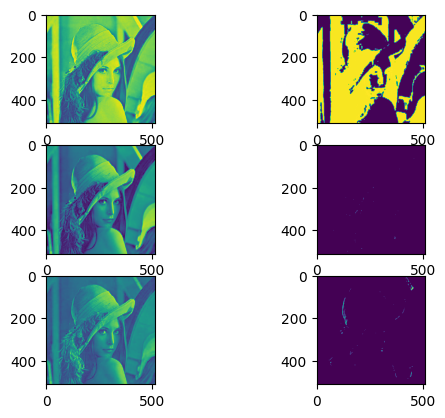

In [28]:
import numpy as np
from enum import Enum
from matplotlib.image import imread
from matplotlib.image import imsave
from matplotlib.pyplot import imshow
import matplotlib.pyplot as plt
import math
import copy
from main import BaseImage
image = imread('./lena.jpg')

img_tab = []
img_tab = np.squeeze(np.dsplit(image, image.shape[-1]))


# img_hsi = BaseImage.to_hsi(image)
# img_tabhsi = np.squeeze(np.dsplit(img_hsi, img_hsi.shape[-1]))
#
# img_tabrgb = copy.copy(img_tabhsi)
#
# for x in range(img_tab.shape[1]):
#     for y in range(img_tab.shape[2]):
#         H = img_tabhsi[0][x][y]
#         S = img_tabhsi[1][x][y]
#         I = img_tabhsi[2][x][y]
#
#
#         if (H == 0):
#             R = I + 2*I*S
#             G = I - I*S
#             B = I - I*S
#         elif (H > 0 and H < 120):
#             R = I + I*S * math.cos(H)/math.cos(60-H)
#             G = I + I*S*(1-math.cos(H)/math.cos(60-H))
#             B = I - I*S
#         elif (H==120):
#             R = I - I*S
#             G = I + 2*I*S
#             B = I-I*S
#         elif (H > 120 and H < 240):
#             R = I - I*S
#             G = I + I*S*math.cos(H-120)/math.cos(180-H)
#             B = I + I*S*(math.cos(H-120)/math.cos(180-H))
#         elif (H==240):
#             R = I - I*S
#             G = I - I*S
#             B = I + 2*I*S
#         else:
#             R = I + I*S*(math.cos(H-240)/math.cos(300-H))
#             G = I - I*S
#             B = I + I*S*math.cos(H-240)/math.cos(300-H)
#
#         img_tabrgb[0][x][y] = R
#         img_tabrgb[1][x][y] = G
#         img_tabrgb[2][x][y] = B
#
#
# img_stacked_layers = np.dstack((img_tabrgb[0], img_tabrgb[1], img_tabrgb[2]))
# imshow(img_stacked_layers)


data = imread("C:/Users/Krystian/Documents/GitHub/WDGM/CW_2/lena.jpg")


datahsv = copy.copy(data)

for x in range(data.shape[0]):
    for y in range(data.shape[1]):
        R = data[x,y,0]
        G = data[x,y,1]
        B = data[x,y,2]

        M = max(R, G, B)
        m = min(R, G, B)

        V = M / 255

        if (M > 0):
            S = 1 - m/M
        else:
            S = 0

        if (G >= B):
            H = math.acos((R - 0.5*G - 0.5*B)/(math.sqrt(R**2 + G**2 + B**2 - R*G - R*B - G*B)))
        else:
            H = 360 - math.acos((R - 0.5*G - 0.5*B)/(math.sqrt(R**2 + G**2 + B**2 - R*G - R*B - G*B)))

        datahsv[x,y,0] = H
        datahsv[x,y,1] = S
        datahsv[x,y,2] = V


r_layer, g_layer, b_layer = np.squeeze(np.dsplit(data, data.shape[-1]))
hsvr_layer, hsvg_layer, hsvb_layer = np.squeeze(np.dsplit(datahsv, datahsv.shape[-1]))

f, ax_arr = plt.subplots(3,2)
ax_arr[0][0].imshow(r_layer)
ax_arr[1][0].imshow(g_layer)
ax_arr[2][0].imshow(b_layer)
ax_arr[0][1].imshow(hsvr_layer)
ax_arr[1][1].imshow(hsvg_layer)
ax_arr[2][1].imshow(hsvb_layer)

plt.show()


